# Ultility and Preparation

In [1]:
# !pip install kaggle
# !pip install kagglehub
# !pip install pandas
# !pip install matplotlib
# !pip install pytorch
# !pip install torchvision

In [2]:
import os
import matplotlib.pyplot as plt
import torch


In [3]:
from src.dataset import SeaTurtleDataset, download_dataset

/opt/homebrew/Caskroom/miniconda/base/envs/dl/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download the dataset

In [4]:
paths = download_dataset()
display(paths)

Dataset downloaded and extracted to: /Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4


{'path': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4',
 'images_path': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data',
 'annotations_path': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data/annotations.json',
 'metadata': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data/metadata.csv',
 'metadata_splits': '/Users/nhut/.cache/kagglehub/datasets/wildlifedatasets/seaturtleid2022/versions/4/turtles-data/data/metadata_splits.csv'}

## Reduce Dataset size while implement models

In [5]:
DATA_DIR = './data/seaturtleid2022-subset'

img_dir=paths['images_path']

train_csv_path = os.path.join(DATA_DIR, "metadata_closed_set_splits_train.csv")
eval_csv_path = os.path.join(DATA_DIR, "metadata_closed_set_splits_eval.csv")
test_csv_path = os.path.join(DATA_DIR, "metadata_closed_set_splits_test.csv")

train_dataset = SeaTurtleDataset(
    annotations_file=train_csv_path, img_dir=img_dir)
eval_dataset = SeaTurtleDataset(
    annotations_file=eval_csv_path, img_dir=img_dir)
test_dataset = SeaTurtleDataset(
    annotations_file=test_csv_path, img_dir=img_dir)

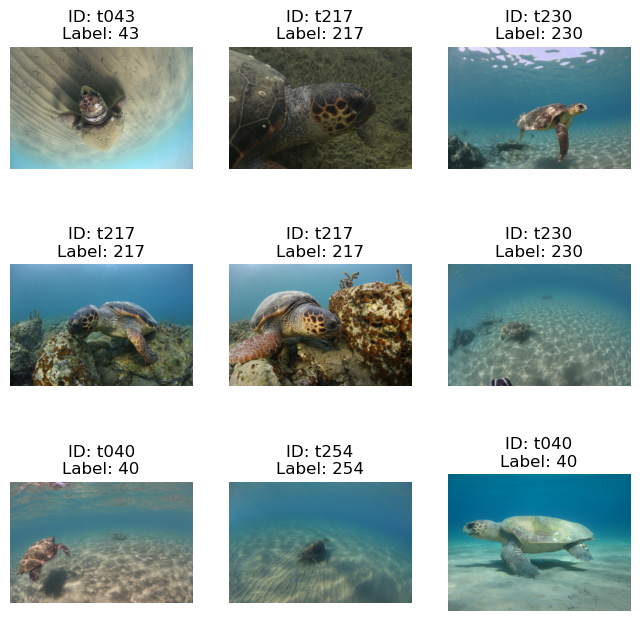

In [6]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label, identity = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f"ID: {identity}\nLabel: {label.item()}")
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()